In [3]:
!pip install datasets sentence-transformers rapidfuzz tqdm --quiet


In [4]:
!pip install docling python-docx pandas pillow pdf2image pydantic==2.* --quiet

In [5]:
!sudo apt install libreoffice --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  apparmor at-spi2-core default-jre default-jre-headless dictionaries-common
  firebird3.0-common firebird3.0-common-doc firebird3.0-server-core
  firebird3.0-utils fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra fonts-liberation2
  fonts-linuxlibertine fonts-noto-core fonts-noto-extra fonts-noto-mono
  fonts-noto-ui-core fonts-opensymbol fonts-sil-gentium
  fonts-sil-gentium-basic gsettings-desktop-schemas gstreamer1.0-gl
  gstreamer1.0-gtk3 gstreamer1.0-plugins-base hunspell-en-us libabsl20210324
  libabw-0.1-1 libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni
  libatk1.0-0 libatk1.0-data libatspi2.0-0 libboost-filesystem1.74.0
  libboost-iostreams1.74.0 libboost-locale1.74.0 libboost-thread1.74.0
  libbsh-java libcdparanoia0 libcdr-0.1-1 libclucene-contribs1v5
  libclucene-core1v5 libco

In [6]:
!pip install langgraph --quiet

In [7]:
!pip install transformers langchain langchain-huggingface langchain_community --quiet

In [8]:
!pip install langdetect --quiet

In [9]:
!pip install langchain-text-splitters tiktoken --quiet

In [10]:
!pip install langchain-core langchain-community --quiet

In [11]:
!pip install pix2tex --quiet

In [12]:
!pip install  pillow tqdm faiss-cpu --quiet

In [13]:
!pip install "langchain-community[retrievers]" --quiet

In [14]:
!pip install PyMuPDF  --quiet

In [15]:
# from __future__ import annotations
# import os
# import io
# import sys
# import re
# import json
# import time
# import torch
# import shutil
# import hashlib
# import argparse
# import subprocess
# import unicodedata
# from pathlib import Path
# from collections import Counter
# from typing import Any, Dict, List, Optional, Tuple, Iterable, Union

# from docling.document_converter import DocumentConverter, PdfFormatOption
# from docling.datamodel.document import DocumentFormat
# from docling.datamodel.base_models import InputFormat
# from docling.datamodel.pipeline_options import PdfPipelineOptions
# from docling_core.types.doc import DocItemLabel

# from langchain_text_splitters import RecursiveCharacterTextSplitter
# from langchain_core.documents import Document

# from langdetect import detect, detect_langs

# import pandas as pd
# from bs4 import BeautifulSoup

# from pix2tex.cli import LatexOCR
# from transformers import (
#     AutoProcessor,
#     AutoModelForVision2Seq,
#     AutoTokenizer,
#     AutoModel,
#     AutoModelForCausalLM,
# )

# from sentence_transformers import SentenceTransformer
# from langchain_community.embeddings import HuggingFaceEmbeddings
# from langchain_core.embeddings import Embeddings

# import faiss
# from langchain_community.vectorstores import FAISS

# from PIL import Image

# from typing import List, Optional, Annotated
# from langchain_community.vectorstores import FAISS
# from langchain.embeddings.base import Embeddings
# from langchain_core.documents import Document

# from typing import TypedDict, List, Union
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from langchain_core.messages import BaseMessage
# from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
# from langdetect import detect, LangDetectException

# import tiktoken

# from langgraph.graph import StateGraph, START, END
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from operator import add



In [16]:
from __future__ import annotations

import os
import io
import sys
import re
import json
import time
import fitz
import torch
import shutil
import hashlib
import argparse
import subprocess
import unicodedata
from pathlib import Path
from collections import Counter
from typing import (
    Any, Dict, List, Optional, Tuple, Iterable, Union, Annotated, TypedDict
)
import pandas as pd
import numpy as np

from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.document import DocumentFormat
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling_core.types.doc import DocItemLabel

from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from langchain_core.embeddings import Embeddings
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.graph import StateGraph, START, END
from langchain_community.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

from langdetect import detect, detect_langs, LangDetectException

from pix2tex.cli import LatexOCR
from transformers import (
    AutoProcessor,
    AutoModelForVision2Seq,
    AutoTokenizer,
    AutoModel,
    AutoModelForCausalLM,
)
from bs4 import BeautifulSoup
from PIL import Image
import tiktoken
import faiss
from langchain_community.vectorstores import FAISS

from sklearn.metrics.pairwise import cosine_similarity

from concurrent.futures import ThreadPoolExecutor, as_completed
from operator import add


/usr/local/lib/python3.12/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.8 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_serializers.py:44: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='noise_params', input_value=UniformParams(noise_type=... 0.058823529411764705)]), input_type=UniformParams])
  v = handler(item, index)
/usr/local/lib/python3.12/dist-packages/pydantic/main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `dict[str, any]` - serialized value may not be as expected [field_name='noise_params', input_value=UniformParams(noise_type=... 0.058823529411764705)])

In [17]:
os.environ["ACCELERATE_DISABLE_RICH"] = "1"
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [18]:
model_gen_caption_id = "Qwen/Qwen3-VL-4B-Instruct"
torch_dtype = torch.bfloat16 if (torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 8) else torch.float16
device_map = "auto"
processor = AutoProcessor.from_pretrained(model_gen_caption_id, trust_remote_code=True)
model_qwen3_vl = AutoModelForVision2Seq.from_pretrained(
    model_gen_caption_id,
    torch_dtype=torch_dtype,
    device_map=device_map,
    trust_remote_code=True
).eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/transformers/models/auto/modeling_auto.py:2284: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(
`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
model_chat_id = "Qwen/Qwen3-4B-Instruct-2507"
tokenizer_chat = AutoTokenizer.from_pretrained(model_chat_id)
model_chat = AutoModelForCausalLM.from_pretrained(model_chat_id, trust_remote_code=True, torch_dtype="auto", device_map="auto")
model_chat.eval()

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Qwen3ForCausalLM(
  (model): Qwen3Model(
    (embed_tokens): Embedding(151936, 2560)
    (layers): ModuleList(
      (0-35): 36 x Qwen3DecoderLayer(
        (self_attn): Qwen3Attention(
          (q_proj): Linear(in_features=2560, out_features=4096, bias=False)
          (k_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (v_proj): Linear(in_features=2560, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=2560, bias=False)
          (q_norm): Qwen3RMSNorm((128,), eps=1e-06)
          (k_norm): Qwen3RMSNorm((128,), eps=1e-06)
        )
        (mlp): Qwen3MLP(
          (gate_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (up_proj): Linear(in_features=2560, out_features=9728, bias=False)
          (down_proj): Linear(in_features=9728, out_features=2560, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): Qwen3RMSNorm((2560,), eps=1e-06)
        (post_attention_layer

In [20]:
fomula_model_id = os.getenv("MATHBERT_ID", "tbs17/MathBERT")
device_formula = "cuda" if torch.cuda.is_available() else "cpu"

ocr_model = LatexOCR()
tokenizer_formula = AutoTokenizer.from_pretrained(fomula_model_id, trust_remote_code = True)
model_formula = AutoModel.from_pretrained(fomula_model_id, trust_remote_code = True)
model_formula.to(device_formula).eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [21]:
model_embedding = SentenceTransformer("BAAI/bge-m3", trust_remote_code=True)

In [22]:
def mean_pool(last_hidden_state: torch.Tensor, attention_mask: torch.Tensor) -> torch.Tensor:
    mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
    sum_embeddings = torch.sum(last_hidden_state * mask_expanded, 1)
    sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

def l2_normalize(x: torch.Tensor) -> torch.Tensor:
    return x / x.norm(p=2, dim=-1, keepdim=True)

In [23]:
class M3Embeddings(Embeddings):
    def __init__(self, faiss_dir: str, model):
        self.faiss_dir = faiss_dir
        self.model = model
        self.vectorstore: Optional[FAISS] = None

    def embed_documents(self, texts: List[str]) -> List[List[float]]:
        vecs = self.model.encode(
            texts,
            batch_size=16,
            normalize_embeddings=True
        )
        return vecs.tolist()

    def embed_query(self, text: str) -> List[float]:
        vec = self.model.encode(
            [text],
            normalize_embeddings=True
        )
        return vec[0].tolist()

    def create_vectorstore(self, docs: List[Document]):
        self.vectorstore = FAISS.from_documents(
            documents=docs,
            embedding=self
        )
        self.vectorstore.save_local(self.faiss_dir)

    def load_db(self):
        self.vectorstore = FAISS.load_local(
            folder_path=self.faiss_dir,
            embeddings=self,
            allow_dangerous_deserialization=True
        )

    def search(self, query: str, top_k: int) -> List[dict]:
        if self.vectorstore is None:
            raise ValueError("Vectorstore chưa được load")
        results = self.vectorstore.similarity_search_with_score(query, k=top_k)
        output = []
        for rank, (doc, score) in enumerate(results, start=1):
            output.append({
                "rank": rank,
                "content": doc.page_content,
                "metadata": doc.metadata,
                "score": float(score)
            })
        return output

class FormulaIndex:
    def __init__(self, faiss_dir: str, model_name: str, model: PreTrainedModel, tokenizer: PreTrainedTokenizer, device: str):
        self.model_name = model_name
        self.tokenizer = tokenizer
        self.model = model
        self.model.eval()
        self.faiss_dir = faiss_dir
        self.device = device

    def embed_formula(self, latex: str) -> np.ndarray:
        if not latex.strip():
            return np.zeros((768,), dtype = np.float32)

        inputs = self.tokenizer(
            [latex],
            return_tensors = "pt",
            padding = True,
            truncation = True,
            max_length = 256
        )

        inputs = {k: v.to(self.device) for k, v in inputs.items()}
        with torch.no_grad():
            out = self.model(**inputs)
            feats = mean_pool(out.last_hidden_state, inputs["attention_mask"])
            feats = l2_normalize(feats).cpu().numpy()
        return feats[0].astype(np.float32)

    def create_vectorstore(self, chunks: List[Document]):
        contents = [c.page_content for c in chunks]
        embs = [self.embed_formula(c) for c in contents]
        class MathEmbeddings(HuggingFaceEmbeddings):
            def embed_documents(self_inner, content: List[str]):
                return [self.embed_formula(c) for c in contents]

            def embed_query(self_inner, query: str):
                return self.embed_formula(query)

        math_embedder = MathEmbeddings(model_name = self.model_name)

        self.vectorstore = FAISS.from_embeddings(
            text_embeddings = list(zip(contents, embs)),
            embedding = math_embedder,
            metadatas = [c.metadata for c in chunks]
        )

        self.vectorstore.save_local(self.faiss_dir)

    def load_db(self):
        class MathEmbeddings(HuggingFaceEmbeddings):
            def embed_documents(self_inner, texts: List[str]):
                return [self.embed_formula(t) for t in texts]

            def embed_query(self_inner, text: str):
                return self.embed_formula(text)

        math_embedder = MathEmbeddings(model_name = self.model_name)
        self.vectorstore = FAISS.load_local(
            folder_path = self.faiss_dir,
            embeddings = math_embedder,
            allow_dangerous_deserialization = True
        )

    def search(self, query: str, top_k: int = 10) -> List[Dict[str, Any]]:
        if self.vectorstore is None:
            raise ValueError("Khong co vectorstore")

        res = self.vectorstore.similarity_search_with_score(query, k = top_k)
        results = []

        for rank, (doc, score) in enumerate(res):
            results.append({
                "rank": rank + 1,
                "latex": doc.page_content,
                "score": float(score),
                "metadata": doc.metadata
            })
        return results


In [24]:
# State lưu thông tin chung của tài liệu
class ParseState(TypedDict):
    sources: List[Path]     # List chứa đường dẫn của tài liệu
    documents_dir: Path     # Đường dẫn thư mục chứa tài liệu sau khi convert từ docx sang pdf
    out: Path     # Đường dẫn thư mục chứa đầu ra
    vectorstore_text: Optional[FAISS]     # Cơ sở dữ liệu vectơ văn bản
    vectorstore_formula: Optional[FAISS]      # Cơ sở dữ liệu vectơ công thức
    docs_path: List[Path]     # Đường dẫn tài liệu cần phân tích
    chunks_text: List[Document]     # Các khối chứa dữ liệu văn bản
    chunks_formula: List[Document]      # Các khối chứa dữ liệu công thức
    done_count: Annotated[int, add]     # Kiểm tra khi nào nhúng dữ liệu xong
    formula_check: bool     # Kiểm tra xem trong tệp có công thức hay không

# State lưu thông tin của từng tài liệu khi phân tích
class DoclingState(TypedDict):
    doc_path: Path      # Đường dẫn của tệp tài liệu đang phân tích
    doc_name: str     # Tên tệp tài liệu đang phân tích
    out: Path     # Đường dẫn thư mục chung chứa đầu ra của các file
    out_doc: Path     # Đường dẫn thư mục chứa đầu ra của file đang xử lý
    dir_fomulas: Path     # Đường dẫn thư mục lưu ảnh công thức
    dir_pictures: Path      # Đường dẫn thư mục lưu hình ảnh
    dir_tables: Path      # Đường dẫn thư mục lưu bảng là html
    metadata_formula: List[Dict[str, Any]]      # Danh sách siêu dữ liệu của công thức
    metadata_pic: List[Dict[str, Any]]      # Danh sách siêu dữ liệu của hình ảnh
    metadata_table: List[Dict[str, Any]]      # Danh sách siêu dữ liệu của bảng
    done_count: Annotated[int, add]     # Kiểm tra xem các nhánh chạy xong chưa
    chunks_text: List[Document]     # Các khối văn bản
    chunks_pic: List[Document]      # Các khối chứa miêu tả của ảnh
    chunks_formula: List[Document]      # Các khối chứa công thức dạng LaTex
    chunks_table: List[Document]      # Các khối chứa các dòng của bảng
    main_language: int    # Lớn hơn bằng 0 là tiếng việt, bằng hoặc nhỏ hơn

In [25]:
# Hàm chuyển đổi file .docx thành file .pdf
def convert_docx_to_pdf(docx_path: Path, out_dir: Path) -> Path:
    pdf_out = out_dir / (docx_path.stem + ".pdf")

    cmd = [
        "libreoffice",
        "--headless",
        "--convert-to", "pdf",
        "--outdir", str(out_dir),
        str(docx_path)
    ]
    subprocess.run(cmd, check=True)

    if not pdf_out.exists():
        raise RuntimeError("Không thể chuyển đổi DOCX -> PDF")
    return pdf_out

# Chuẩn hoá tên file
def safe(name: str) -> str:
    return re.sub(r'[^-\w.,() \u00C0-\u1EF9]+', '_', name).strip()[:120] or "untitled"

# Lấy danh sách trang
def pages_of(item):
    try:
        pages = sorted({seg.page_no for seg in (item.prov or []) if getattr(seg, "page_no", None) is not None})
        return pages if pages else []
    except Exception:
        return []

# Khởi tạo converter cho PDF
def create_converter():
    pdf_opts = PdfPipelineOptions (
        generate_page_images = True,
        images_scale = 2.0,
        do_ocr = False,
        do_table_structure = True
    )
    converter = DocumentConverter(format_options = {InputFormat.PDF: PdfFormatOption(pipeline_options = pdf_opts)})
    return converter

#Chuẩn hoá Unicode, kí tự, khoảng trắng, dấu câu
def normalize_text(text: str) -> str:
  text = unicodedata.normalize("NFKC", text or "")
  text = text.replace("’", "'").replace("“", '"').replace("”", '"')
  text = re.sub(r"[ \t\r]+", " ", text)
  text = re.sub(r"\s+([,.;:!?%)\]])", r"\1", text)
  text = re.sub(r"([(\[])\s+", r"\1", text)
  return text.strip()


# Xác định ngôn ngữ chính của văn bản
def detect_lang(text: str) -> str:
    try:
        return detect(text)
    except LangDetectException:
        return "unknow"

# Xác định nội dung nằm ở heading nào
def belongs_to(doc_name: str, section_stack: List[Dict]) -> List[str]:
    belong = [doc_name]
    level = 10
    for i in section_stack[::-1]:
        if i["level"] < level:
            belong.append(i["title"])
            level = i["level"]
    return belong[::-1]


In [26]:
# Phân loại heading
def classify_heading_token(First_Time: bool, Is_Number_Heading: bool, Max_Level: str, text: str) -> Tuple[bool, bool, str, int]:
    TITLE_HIGHEST = re.compile(r'^[^\W\d_]+(?: [^\W\d_]+)*$')
    TITLE_CHAPTER = re.compile(
        r'^\s*'
        r'(?P<label>[^\W\d_]+(?:\s+[^\W\d_]+)?)'   # 1 hoặc 2 từ nhãn (Unicode letters)
        r'\s+'
        r'(?P<number>\d+)'                         # chỉ 1 số (không 1.2.3)
        r'\s*'
        r'(?P<sep>[:.])'                           # dấu : hoặc .
        r'(?:\s+|(?=[^\W\d_]))'                    # sau sep: phải là space hoặc là CHỮ (không phải số)
        r'\s*(?P<title>.*)$',
        re.IGNORECASE
    )

    DEC_HEAD = re.compile(
        r'^\s*(\d+(?:\.\d+)*)'     # 1 / 1.1 / 1.1.1 / 1.1.1.1 ...
        r'(?:[.)])?'               # tùy chọn . hoặc )
        r'(?:\s+|[:]|(?=[^\W\d_])|$)'  # CHO PHÉP: space | dấu : | hoặc kế tiếp là CHỮ | hoặc hết chuỗi
    )
    DEC_SINGLE_HEAD = re.compile(r'^(\d+)[.)\s]')           # 1.  2)  3
    ROMAN_U_TOKEN   = re.compile(r'^[IVXLCDM]+[.)]?$')       # I.  II)  IV
    ROMAN_l_TOKEN   = re.compile(r'^[ivxlcdm]+[.)]?$')       # i.  ii)  iv
    ALPHA_U_HEAD    = re.compile(r'^([A-Z])([.)\s])')       # A.  B)  C
    ALPHA_l_HEAD    = re.compile(r'^([a-z])([.)\s])')       # a.  b)  c


    # Text toàn chữ được xác định là header mà không có đề mục
    m = TITLE_HIGHEST.match(text)
    if m:
        return First_Time, Is_Number_Heading, Max_Level, 1
    # Text có từ thứ nhất hoặc 2 là chữ và sau đó là số
    m = TITLE_CHAPTER.match(text)
    if m:
        return First_Time, Is_Number_Heading, Max_Level, 1

    # Xác định cấp cao nhất của tài liệu
    if First_Time:
        m = DEC_HEAD.match(text)
        if m:
            First_Time = False
            Is_Number_Heading = True
            return First_Time, Is_Number_Heading, Max_Level, len(m.group(1).split('.'))

        Is_Number_Heading = False
        m = ALPHA_U_HEAD.match(text)
        if m:
            Max_Level = "Alpha"
            return First_Time, Is_Number_Heading, Max_Level, 1
        m = ROMAN_U_TOKEN.match(text)
        if m:
            Max_Level = "Roman"
            return First_Time, Is_Number_Heading, Max_Level, 1
        m = DEC_SINGLE_HEAD.match(text)
        if m:
            Max_Level = "Decimal"
            return First_Time, Is_Number_Heading, Max_Level, 1

    if Is_Number_Heading == True:
        m = DEC_HEAD.match(text)
        if m:
            return First_Time, Is_Number_Heading, Max_Level, len(m.group(1).split("."))
        else:
            return First_Time, Is_Number_Heading, Max_Level, 0
    else:
        if Max_Level == "Alpha":
            m = ALPHA_U_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 1
            m = ROMAN_U_TOKEN.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 2
            m = DEC_SINGLE_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 3
            m = ALPHA_l_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 4
            m = ROMAN_l_TOKEN.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 5

        if Max_Level == "Roman":
            m = ROMAN_U_TOKEN.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 1
            m = DEC_SINGLE_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 2
            m = ALPHA_l_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 3
            m = ROMAN_l_TOKEN.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 4

        if Max_Level == "Decimal":
            m = DEC_SINGLE_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 1
            m = ALPHA_l_HEAD.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 2
            m = ROMAN_l_TOKEN.match(text)
            if m:
                return First_Time, Is_Number_Heading, Max_Level, 3

    return First_Time, Is_Number_Heading, Max_Level, 0

In [27]:
# Phân tích tài liệu theo docling
def docling_parse(state: DoclingState):
    print(f"Dang xu ly: {state['doc_path']}")

    converter = create_converter()
    state["doc_name"] = safe(state["doc_path"].stem)
    state["out_doc"] = state["out"] / state["doc_name"]
    state["out_doc"].mkdir(parents = True, exist_ok = True)
    state["dir_fomulas"] = state["out_doc"] / "formulas"
    state["dir_pictures"] = state["out_doc"] / "pictures"
    state["dir_tables"] = state["out_doc"] / "tables"

    state["main_language"] = 0

    for d in (state["dir_fomulas"], state["dir_pictures"], state["dir_tables"]):
        d.mkdir(parents = True, exist_ok = True)

    # Khai báo xác định kiểu heading của tài liệu
    First_Time = True
    Is_Number_Heading = True
    Max_Level = ""

    result = converter.convert(state["doc_path"])
    doc = result.document

    section_stack: List[Dict] = []
    metadata_pic: List[Dict]  = []
    metadata_formula: List[Dict] = []
    metadata_table: List[Dict] = []
    index_pic = 1
    index_formula = 1
    index_table = 1

    for item, l in doc.iterate_items():
        label = getattr(item, "label", "").strip()
        pages = pages_of(item)
        text = ""
        if label in {"section_header", "title", "list_item", "text", "paragraph", "handwritten_text"}:
            text = (item.text if item.text else "").strip()

        # Chuẩn hoá text để xác định language
        text = normalize_text(text)
        lang = "unknow"
        if len(text.split(" ")) >= 3:
            lang = detect_lang(text)
        if lang == "vi":
            state["main_language"] += 1
        elif lang == "en":
            state["main_language"] -= 1

        # Tạo một section mới
        section_data = {
            "title": None,
            "level": 1,
            "content": "",
            "page": pages,
            "languages": lang,
            "subsections": []
        }

        # Kiểm tra heading từ "section_header", "title" và "list_item"
        if label in {"section_header", "title", "list_item"}:
            First_Time, Is_Number_Heading, Max_Level, level = classify_heading_token(First_Time, Is_Number_Heading, Max_Level, text)

            if level:
                section_data["title"] = text
                section_data["level"] = level

                # Gom các section có level thấp hơn lại
                while section_stack and section_stack[-1]["level"] > level:
                    section_child = []
                    section_child.append(section_stack.pop())
                    level_child = section_child[0]["level"]

                    # Gom nhóm những section có cùng level
                    while section_stack and section_stack[-1]["level"] == level_child:
                        section_child.append(section_stack.pop())
                    # Section sau đó sẽ có level cao hơn -> gán những section con vào section này
                    if section_stack:
                        section_stack[-1]["subsections"].extend(section_child[::-1])
                section_stack.append(section_data)

            # Fix tạm thời những phần section_header không nhận diện được hoặc nhận diện sai
            elif label in {"section_header", "title"} and text != "":
                if section_stack == [] :
                    section_data["content"] = text
                    section_stack.append(section_data)
                else:
                    section_tmp = section_stack[-1]
                    section_stack[-1]["content"] += (" \n" if section_tmp["content"] else "") + text

            # List item không phải là heading
            else:
                marker = getattr(item, "marker", None)
                if marker:
                    text = f"{marker} {text}"
                if section_stack and text != "":
                    section_stack[-1]["content"] += (" \n" if section_stack[-1]["content"] else "") + text

        # Nội dung text thường
        elif label in {"text", "paragraph", "handwritten_text"}:
            if section_stack and text != "":
                section_tmp = section_stack[-1]
                section_stack[-1]["content"] += (" \n" if section_tmp["content"] else "") + text

        # Nội dung là ảnh
        elif label in {"picture", "chart", "form", "picture_area", "form_area"}:
            img = item.get_image(doc)
            if img:
                img_path = state["dir_pictures"] / f"{index_pic}.png"
                img.save(img_path)

                caption = item.caption_text(doc)
                metadata_pic.append({
                    "index": index_pic,
                    "caption": caption if caption else "",
                    "page": pages,
                    "path": str(img_path),
                    "belongs_to": belongs_to(state["doc_name"], section_stack)
                })
                index_pic += 1
        # Nội dung là bảng
        elif label in {"table", "document_index"}:
            table = item.export_to_html(doc)
            html = table () if callable(table) else table

            if html:
                table_path = state["dir_tables"] / f"{index_table}.html"
                table_path.write_text(html, encoding = "utf-8")
                caption = item.caption_text(doc)
                metadata_table.append({
                    "index": index_table,
                    "caption": caption if caption else "",
                    "page": pages,
                    "path": str(table_path),
                    "belongs_to": belongs_to(state["doc_name"], section_stack)
                })
                index_table += 1
        # Nếu nội dung là công thức
        elif label == "formula":
            formula = item.get_image(doc)
            if formula:
                formula_path = state["dir_fomulas"] / f"{index_formula}.png"
                formula.save(formula_path)
                metadata_formula.append({
                    "index": index_formula,
                    "page": pages,
                    "path": str(formula_path),
                    "belongs_to": belongs_to(state["doc_name"], section_stack)
                })
                index_formula += 1

    # Gộp các section lại khi phân tích hết file
    for i in range(len(section_stack) - 1, 0, -1):
        for j in range(i - 1, -1, -1):
            if section_stack[j]["level"] < section_stack[i]["level"]:
                section_stack[j]["subsections"].append(section_stack[i])
                break

    with open(state["out_doc"] / "structured_text.json", "w", encoding="utf-8") as f:
        json.dump(section_stack, f, ensure_ascii=False, indent=2)

    with open(state["out_doc"] / "main_lang.txt", "w", encoding="utf-8") as f:
        f.write(str(state["main_language"]))

    state["metadata_formula"] = metadata_formula
    state["metadata_pic"] = metadata_pic
    state["metadata_table"] = metadata_table
    return state

In [28]:
BULLET_CHARS = set("•●◦·∙×✕✖︎✗♠♣†*∗≤≥→←↔↦↳↺↻▪◻◼▸►▹▻□■◆◇★☆△▽▲▼")
# Xem có phải nhiễu không
def is_noise_block(text: str) -> bool:
    if not text:
        return True
    if set(text) <= BULLET_CHARS:
        return True
    if alpha_ratio(text) < 0.3:
        return True
    return False

# Tinh tỉ lệ chữ cái trong câu
def alpha_ratio(text: str) -> float:
  letters = sum(c.isalpha() for c in text)
  return letters / len(text)

# Chuẩn hoá văn bản vào xoá các node nhiễu
def normalize_and_delete(blocks: dict, ):

    blocks["content"] = normalize_text(blocks["content"])

    if is_noise_block(blocks["content"]):
        blocks["content"] = ""

    if blocks["subsections"] == [] and blocks["content"] == "" and blocks["level"] not in {0, 1}:
        blocks.clear()
        return

    for block in blocks["subsections"]:
        normalize_and_delete(block)

# Tính toán số token
enc = tiktoken.get_encoding("cl100k_base")
def token_len(s: str) -> int:
    return len(enc.encode(s))

# Khởi tạo splitter để chunking đệ quy
splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " ", ""],
    chunk_size = 700,
    chunk_overlap = 80,
    length_function = token_len,
    add_start_index = True
)


In [29]:
# Duyệt các blocks
def iter_blocks(root: Dict[str, Any], title_path = None):
    if root == {}:
        return
    if title_path is None:
        title_path = []
    title = root.get("title", "")
    new_title_path = title_path + ([title] if title else [])
    yield root, new_title_path, root.get("level", 1), root.get("page", []), root.get("languages", "")

    for child in root.get("subsections", []):
        yield from iter_blocks(child, new_title_path)

In [30]:
# Chia khối theo kiểu đệ quy
def recursiveChunking(json_doc: Dict[str, Any], min_chunk_chars: int = 300) -> List[Dict[str, Any]]:
    chunks: List[Document] = []
    for block, title_path, level, page, language in iter_blocks(json_doc):
        text = block["content"].strip()
        if not text:
            continue

        pieces = splitter.split_text(text)
        if len(text) < min_chunk_chars and len(pieces) <= 1:
            pieces = [text]
        meta_base = {
            "title_path": title_path,
            "level": level,
            "language": language,
            "page": page
        }
        # Gội những chunk ngắn lại
        group_pieces = []
        if pieces != []:
            group_pieces.append(pieces[0])

        for i in range(1, len(pieces)):
            if token_len(group_pieces[-1]) + token_len(pieces[i]) < 700:
                group_pieces[-1] += " " + pieces[i]
            else:
                group_pieces.append(pieces[i])

        # Gán title cho phần đầu tiên để agent trả lời biết nội dung thuộc phần nào
        title_path = ". ".join(meta_base["title_path"])
        group_pieces[0] = title_path + "\n" + group_pieces[0]
        for id, p in enumerate(group_pieces):
            meta_base["chunk_id"] = id
            chunks.append(Document(
                page_content = p,
                metadata = meta_base
            ))
    return chunks

In [31]:
# Nút tiền xử lý văn bản
def text_preprocess(state: DoclingState):
    text_path = state["out_doc"] / "structured_text.json"
    blocks: List[Dict[str, Any]] = []
    with text_path.open("r", encoding = "utf-8") as f:
        blocks = json.load(f)
    assert isinstance(blocks, list)

    lang = "vi" if state["main_language"] >= 0 else "en"
    # Bọc vào khối root gốc
    root = {"title": state["doc_name"], "level": 0, "content": "", "lang": lang, "page": [], "subsections": blocks}
    # Chuẩn hoá và xác các block nhiễu
    normalize_and_delete(root)
    # Chunking đệ quy văn bản
    chunks = recursiveChunking(root)
    with open(state["out_doc"] / "chunks_text.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks
            ],
            f,
            ensure_ascii=False,
            indent=2
        )
    return {"chunks_text": chunks,
            "done_count": 1}


In [32]:
# Nút tiền xử lý bảng
def table_preprocess(state: DoclingState):
    chunks: List[Document] = []
    for table_meta in state["metadata_table"]:
        path = Path(table_meta["path"])

        with open(path, "r", encoding = "utf-8") as f:
            table_content = f.read()
        soup = BeautifulSoup(table_content, "lxml")

        tables = soup.find_all("table")
        table_chunks = []

        for tbl_id, tbl in enumerate(tables):
            # Lấy section
            section_tag = tbl.find_previous(["h2", "h3", "h4"])
            section_text = section_tag.get_text(strip = True) if section_tag else ""
            # Lấy caption
            caption_tag = tbl.find("caption")
            caption_text = caption_tag.get_text(strip = True) if caption_tag else ""

            # Sử dụng pandas để chuyển bảng html thành dataframe
            try:
                df_list = pd.read_html(str(tbl), header = 0)
            except ValueError:
                continue
            if not df_list:
                continue
            df = df_list[0]

            # Forward-fill các cột stub bên trái (nếu có ô NaN)
            for col in df.columns:
                if df[col].isna().any():
                    df[col].ffill(inplace=True)
                else:
                    # Dừng lại khi gặp cột không có NA
                    break

            # Duyệt từng hàng dữ liệu của bảng (iterrows để lấy chỉ số và Series)
            for row_idx, row in df.iterrows():
                row_data = {}
                for col, val in row.items():
                    if isinstance(col, tuple):
                        col_name = " - ".join([str(c) for c in col if c is not None])
                    else:
                        col_name = str(col)
                    # Xử lý giá trị nan
                    if pd.isna(val):
                        row_data[col_name] = None
                    else:
                        row_data[col_name] = val

                # Tạo trường text với Section, Caption, Row và dữ liệu hàng (JSON string)
                text_lines = []
                if section_text:
                    text_lines.append(section_text)
                if caption_text:
                    text_lines.append(caption_text)
                text_lines.append("Row")
                # Chuyển row_data dict thành chuỗi JSON (ensure_ascii=False để giữ unicode)
                row_json_str = json.dumps(row_data, ensure_ascii=False)
                text_lines.append(row_json_str)

                text_content = "\n".join(text_lines)
                table_chunks.append(text_content)
        table_meta["chunks"] = table_chunks
        meta_base = {
            "title_path": table_meta["belongs_to"],
            "page": table_meta["page"],
            "caption": table_meta["caption"]
        }
        chunks.append(Document(
            page_content = "\n".join(table_chunks),
            metadata = meta_base
        ))
    state["chunks_table"] = chunks

    with open(state["out_doc"] / "chunks_table.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks
            ],
            f,
            ensure_ascii=False,
            indent=2
        )
    return {"metadata_table": state["metadata_table"],
            "chunks_table": chunks,
            "done_count": 1}


In [33]:
# Tạo messages và prompt để phù hợp với Qwen3
def build_messages(lang: str, caption: str, img: Image.Image):
    if lang.lower() == "vi":
        sys_text = (
            "Bạn là trợ lý mô tả ảnh chính xác, đầy đủ và chi tiết hình ảnh, sơ đồ, biểu đồ bằng TIẾNG VIỆT. "
            "Với các hình ảnh, biểu đồ, sơ đồ phức tạp, hãy cố gắng miêu tả chi tiết từng thành phần. "
            "Tuyệt đối KHÔNG dùng ngôn ngữ khác ngoài TIẾNG VIỆT. "
            "Nếu có thông tin hoặc chữ trong ảnh khó xác định thì bỏ qua, không suy đoán. "
            "Mô tả ảnh bằng tiếng Việt phải có độ dài từ 4 đến 7 câu, có thể dựa vào caption như gợi ý nếu có. "
            "Chỉ trả về phần mô tả bằng tiếng Việt"
        )
        user_text = (
            "Mô tả tự nhiên, nêu rõ chủ thể, bối cảnh, hành động, chi tiết nổi bật. "
            "Với các hình ảnh, biểu đồ, sơ đồ phức tạp, hãy cố gắng miêu tả chi tiết từng phần  "
            "Nếu trong ảnh có chữ KHÔNG PHẢI TIẾNG VIỆT, nếu có thể, hãy dựa vào đó để mô tả bằng TIẾNG VIỆT"
            f"Caption người dùng thêm vào (có thể bỏ trống): {caption}"
        )
    sys_text = (
        "You are an assistant that accurately, completely, and thoroughly describes images, diagrams, and charts in ENGLISH. "
        "For complex images, diagrams, or charts, try to describe each component in detail. "
        "Absolutely DO NOT use any language other than ENGLISH. "
        "If there is text or information in the image that is difficult to identify, skip it without guessing. "
        "The description in English must be between 4 and 7 sentences long, and you may refer to the provided caption as a hint if available. "
        "Return only the English description."
    )

    user_text = (
        "Write a natural description that clearly identifies the subject, context, actions, and notable details. "
        "For complex images, diagrams, or charts, try to describe each part in detail. "
        "If the image contains text NOT IN ENGLISH, when possible, use it as a basis to describe the content IN ENGLISH. "
        f"User-provided caption (may be empty): {caption}"
    )


    return [
        {"role": "system", "content": sys_text},
        {"role": "user", "content": [{"type": "image", "image": img},
                                     {"type": "text", "text": user_text}]}
    ]

In [34]:
# Nút tiền xử lý ảnh
def pic_preprocess(state: DoclingState):
    from PIL import Image
    chunks: List[Document] = []

    for pic_meta in state["metadata_pic"]:
        path = Path(pic_meta["path"])
        caption = pic_meta["caption"]
        lang = state["main_language"]
        if lang >= 0:
            lang = "vi"
        else:
            lang = "en"

        try:
            if not path or not os.path.exists(path):
                raise FileNotFoundError(f"Không thấy ảnh: {path}")

            img = Image.open(path).convert("RGB")
            message = build_messages(lang, caption, img)
            prompt = processor.apply_chat_template(message, add_generation_prompt = True)

            inputs = processor(text = prompt, images = img, return_tensors = "pt")
            for k, v in inputs.items():
                inputs[k] = v.to(model_qwen3_vl.device)

            gen_ids = model_qwen3_vl.generate(
                **inputs,
                max_new_tokens = 256,
                do_sample = True,
                top_p = 0.9,
                temperature = 0.05,
                eos_token_id = getattr(processor, "eos_token_id", None) or getattr(getattr(processor, "tokenizer", None), "eos_token_id", None)
            )

            cut = inputs["input_ids"].shape[1]
            text = processor.batch_decode(gen_ids[:, cut:], skip_special_tokens = True)[0].strip()
            pic_meta["description"] = text
        except Exception as e:
            print(f"Loi o file {path}")
            print(e)

        meta_base = {
            "title_path": pic_meta["belongs_to"],
            "page": pic_meta["page"],
            "caption": pic_meta["caption"]
        }
        chunks.append(Document(
            page_content = text,
            metadata = meta_base
        ))

    state["chunks_pic"] = chunks

    with open(state["out_doc"] / "chunks_pic.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks
            ],
            f,
            ensure_ascii=False,
            indent=2
        )

    return {"metadata_pic": state["metadata_pic"],
            "chunks_pic": chunks,
            "done_count": 1}

In [35]:
# Nút tiền xử lý công thức
def formula_preprocess(state: DoclingState):
    from PIL import Image

    chunks: List[Document] = []

    for formula in state["metadata_formula"]:
        path = Path(formula["path"])
        img = Image.open(path).convert("RGB")
        latex = ""
        try:
            latex = ocr_model(img)
        except Exception as e:
            print(f"OCR fail: {e}")
        formula["latex"] = latex
        meta_base = {
                "title_path": formula["belongs_to"],
                "page": formula["page"],
            }
        chunks.append(Document(
            page_content = latex,
            metadata = meta_base
        ))

    with open(state["out_doc"] / "chunks_formula.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks
            ],
            f,
            ensure_ascii=False,
            indent=2
        )
    return {"metadata_formula": state["metadata_formula"],
            "chunks_formula": chunks,
            "done_count": 1}

In [36]:
# Nút kiểm tra xem với điều kiện xem 4 nhánh tiền xử lý dữ liệu đã xong hết chưa
def check_complete(state: DoclingState):
    return {}

# Điều kiện kiểm tra xem 4 nhánh tiền xử lý dữ liệu đã xong hết chưa
def completed(state: DoclingState):
  check = True if state.get("done_count", 0) == 4 else False
  return check
# Chờ đợi khi 4 nhánh tiền xử lý dữ liệu chưa xong
def wait(state: DoclingState):
    return {}

In [37]:
# Nút hợp nhất văn bản từ 3 nút tiền xử lý văn bản, tiền xử lý ảnh, tiền xử lý bảng
def merged_text(state: DoclingState):
    doc_name = state["doc_name"]
    state["chunks_text"] = state["chunks_text"] + state["chunks_pic"] + state["chunks_table"]
    return {"chunks_text": state["chunks_text"]}

In [38]:
# Build tạm subgraph_parse
def build_subgraph_parse():
    parse_doc_subgraph = StateGraph(DoclingState)
    parse_doc_subgraph.add_node("docling_parse", docling_parse)
    parse_doc_subgraph.add_node("text_preprocess", text_preprocess)
    parse_doc_subgraph.add_node("table_preprocess", table_preprocess)
    parse_doc_subgraph.add_node("pic_preprocess", pic_preprocess)
    parse_doc_subgraph.add_node("formula_preprocess", formula_preprocess)
    parse_doc_subgraph.add_node("check_complete", check_complete)
    parse_doc_subgraph.add_node("wait", wait)
    parse_doc_subgraph.add_node("merged_text", merged_text)

    parse_doc_subgraph.add_edge(START, "docling_parse")
    parse_doc_subgraph.add_edge("docling_parse", "text_preprocess")
    parse_doc_subgraph.add_edge("docling_parse", "table_preprocess")
    parse_doc_subgraph.add_edge("docling_parse", "pic_preprocess")
    parse_doc_subgraph.add_edge("docling_parse", "formula_preprocess")

    parse_doc_subgraph.add_edge("formula_preprocess", "check_complete")
    parse_doc_subgraph.add_edge("text_preprocess", "check_complete")
    parse_doc_subgraph.add_edge("table_preprocess", "check_complete")
    parse_doc_subgraph.add_edge("pic_preprocess", "check_complete")


    parse_doc_subgraph.add_conditional_edges(
        "check_complete",
        completed,
        {
            True: "merged_text",
            False: "wait"
        }
    )

    parse_doc_subgraph.add_edge("wait", "check_complete")
    parse_doc_subgraph.add_edge("merged_text", END)

    return parse_doc_subgraph.compile()

parse_doc_subgraph = build_subgraph_parse()

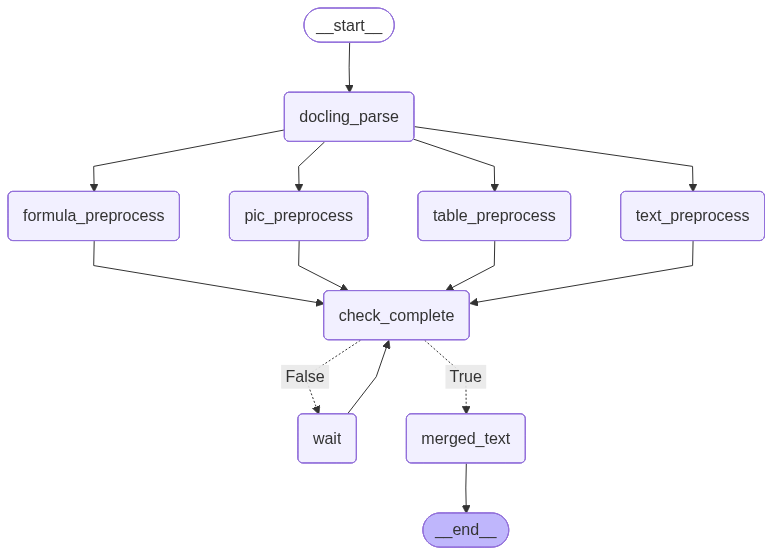

In [39]:
from IPython.display import Image, display
display(Image(parse_doc_subgraph.get_graph().draw_mermaid_png()))

In [40]:
# Node chuyển đổi tài liệu docx thành pdf và chuyển tài liệu vào thư mục documents_dir
def convert_document(state: ParseState):
    Path("/content/Documents").mkdir(parents = True, exist_ok = True)
    state["documents_dir"] = Path("/content/Documents")

    state["out"] = Path("/content/out")
    state["out"].mkdir(parents = True, exist_ok = True)
    state["docs_path"] = []

    for i in range(0, len(state["sources"])):
        if state["sources"][i].suffix.lower() == ".docx":
            state["sources"][i] = convert_docx_to_pdf(state["sources"][i], state["documents_dir"])
        else:
            state["sources"][i] = Path(shutil.copy(state["sources"][i], state["documents_dir"]))

        doc_name = safe(state["sources"][i].stem)
        doc_path = state["out"] / doc_name
        state["docs_path"].append(doc_path)
    return state

In [41]:
# Node khởi tạo phân tích tài liệu song song
def parallel_parse(state: ParseState):
    futures = []
    with ThreadPoolExecutor(max_workers=len(state["sources"])) as ex:
        for s in state["sources"]:
            sub_state = {"doc_path": s, "out": state["out"]}
            futures.append(ex.submit(parse_doc_subgraph.invoke, sub_state))

        for fut in as_completed(futures):
            fut.result()

In [42]:
# Load các chunks từ của các tài liệu
def load_chunks(chunk_path: Path) -> List[Document]:
    chunks: List[Document] = []
    with open(chunk_path, "r", encoding="utf-8") as f:
        for chunk in json.load(f):
            chunks.append(Document(
                page_content = chunk["page_content"],
                metadata = chunk["metadata"]
            ))
    return chunks

In [43]:
def merged_document(state: ParseState):
    chunks_text: List[Document] = []
    chunks_formula: List[Document] = []
    main_lang = 0

    for doc_path in state["docs_path"]:
        chunks_text += load_chunks(doc_path/ "chunks_text.json")
        chunks_text += load_chunks(doc_path/ "chunks_pic.json")
        chunks_text += load_chunks(doc_path/ "chunks_table.json")
        chunks_formula += load_chunks(doc_path/ "chunks_formula.json")

        with open(doc_path / "main_lang.txt", "r", encoding="utf-8") as f:
            main_lang += int(f.read())

    state["chunks_text"] = chunks_text
    state["chunks_formula"] = chunks_formula
    with open(state["out"] / "chunks_formula.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks_formula
            ],
            f,
            ensure_ascii=False,
            indent=2
        )

    with open(state["out"] / "chunks_text.json", "w", encoding="utf-8") as f:
        json.dump(
            [
                {
                    "page_content": doc.page_content,
                    "metadata": doc.metadata
                }
                for doc in chunks_text
            ],
            f,
            ensure_ascii=False,
            indent=2
        )

    with open(state["out"] / "main_lang.txt", "w", encoding = "utf-8") as f:
        f.write(str(main_lang))

    return {"chunks_text": chunks_text,
            "chunks_formula": chunks_formula}

In [44]:
# Nhúng văn bản bằng mô hình nhúng M3
def embedding_text(state: ParseState):
    faiss_dir = state["out"] / "vectorstore_text"
    vectorstore_text = M3Embeddings(faiss_dir=faiss_dir, model=model_embedding)
    vectorstore_text.create_vectorstore(state["chunks_text"])
    return {"done_count": 1}

# Nhúng công thức bằng mô hình MathBERT
def embedding_formula(state: ParseState):
    if state["chunks_formula"] == []:
        state["formula_check"] = False
        return {"done_count": 1}

    state["formula_check"] = True
    faiss_dir = state["out"] / "vectorstore_formula"
    vectorstore_formula = FormulaIndex(faiss_dir = faiss_dir, model_name = "tbs17/MathBERT", model = model_formula, tokenizer = tokenizer_formula, device = "cuda")
    vectorstore_formula.create_vectorstore(state["chunks_formula"])
    return {"done_count": 1}


In [45]:
# Nút kiểm tra xem với điều kiện xem 2 nhánh nhúng dữ liệu đã xong hết chưa
def check_complete(state: ParseState):
    return
# Điều kiện kiểm tra xem 2 nhánh nhúng dữ liệu đã xong hết chưa
def completed(state: ParseState):
    check = True if state["done_count"] == 2 else False
    return check
# Chờ đợi khi 2 nhánh nhúng dữ liệu đã xong hết chưa
def wait(state: ParseState):
    return

In [46]:
def build_root_graph():
    root_graph = StateGraph(ParseState)
    root_graph.add_node("convert_document", convert_document)
    root_graph.add_node("parallel_parse", parallel_parse)
    root_graph.add_node("merged_document", merged_document)
    root_graph.add_node("embedding_text", embedding_text)
    root_graph.add_node("embedding_formula", embedding_formula)
    root_graph.add_node("check_complete", check_complete)
    root_graph.add_node("wait", wait)

    root_graph.add_edge(START, "convert_document")
    root_graph.add_edge("convert_document", "parallel_parse")
    root_graph.add_edge("parallel_parse", "merged_document")
    root_graph.add_edge("merged_document", "embedding_text")
    root_graph.add_edge("merged_document", "embedding_formula")
    root_graph.add_edge("embedding_text", "check_complete")
    root_graph.add_edge("embedding_formula", "check_complete")
    root_graph.add_conditional_edges(
        "check_complete",
        completed,
        {
            True: END,
            False: "wait"
        }
    )
    root_graph.add_edge("wait", "check_complete")
    return root_graph.compile()

root_graph = build_root_graph()

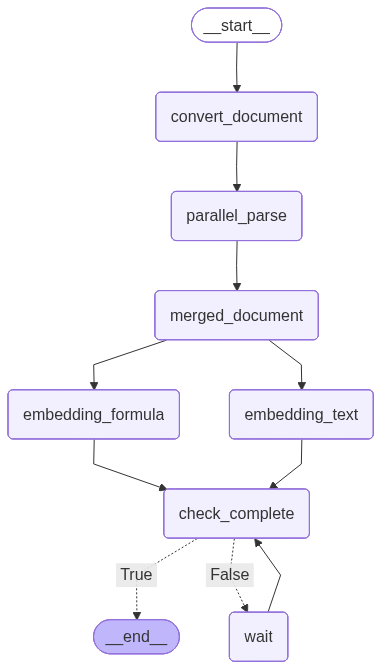

In [47]:
from IPython.display import Image, display
display(Image(root_graph.get_graph().draw_mermaid_png()))

In [48]:
# Định nghĩa kiểu State của RAG
class ChatState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage, SystemMessage]]     # Lịch sử tin nhắn của người dùng và hệ thống
    search_query_input: str     # Truy vấn của người dùng
    search_query: str     # Truy vấn của người dùng được dịch theo ngôn ngữ chính của tài liệu
    formula_needed: bool      # Kiểm tra xem có cần truy vấn công thức hay không
    text_results: List[dict]      # Kết quả văn bản sau khi truy vấn
    formula_results: List[dict]      # Kết quả công thức sau khi truy vấn
    merged_results: List[dict]      # Kết quả sau khi hợp nhất, chuẩn hoá, làm sạch và xếp hạng nội dung truy vấn văn bản và công thức
    answer: str     # Câu trả lời do Qwen3 sinh ra từ thông tin truy xuất
    formula_check: bool   # True nếu có công thức, False nếu không có công thức
    text_index: Any     # Cơ sở dữ liệu vector văn bản
    formula_index: Any      # Cơ sở dữ liệu vector công thức
    done_count: Annotated[int, add]     # Điều kiện kiểm tra xem các nhánh song song đã xong chưa
    main_lang: int      # Ngôn ngữ chính của tài liệu, với tiếng Việt là > 0, ngược lại là tiếng Anh
    answer_lang: Annotated[int, add]      # Ngôn ngữ mà hệ thống sẽ trả lời dựa vào ngôn ngữ truy vấn của người dùng

In [49]:
# Lấy lịch sử tin nhắn là 20 tin nhắn gần nhất
def trim_history(state: ChatState, limit: int = 20):
    msgs = state.get("messages", [])
    if len(msgs) > limit:
        state["messages"] = msgs[-limit:]

# Chuyển đổi message sang kiểu phù hợp với Qwen3
def convert_messages_for_qwen(messages: List[BaseMessage]) -> List[dict]:
    converted = []
    for m in messages:
        if isinstance(m, HumanMessage):
            role = "user"
        elif isinstance(m, AIMessage):
            role = "assistant"
        elif isinstance(m, SystemMessage):
            role = "system"
        else:
            role = getattr(m, "role", "user")
        converted.append({"role": role, "content": m.content})
    return converted


In [50]:
# Dịch câu truy vấn của người dùng sang ngôn ngữ chính của tài liệu để truy xuất hiệu quả hơn
def translate(text: str, main_lang: int) -> str:
    if not text.strip():
        return text

    if main_lang > 0:
        instruction = "Hãy dịch câu sau sang tiếng Việt:"
    else:
        instruction = "Translate the following sentence into English:"


    messages = [
        {"role": "system", "content": "Bạn là hệ thống dịch thuật chính xác và ngắn gọn."},
        {"role": "user", "content": f"{instruction}\n{text}"}
    ]

    prompt = tokenizer_chat.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    inputs = tokenizer_chat([prompt], return_tensors="pt").to(model_chat.device)
    outputs = model_chat.generate(**inputs, max_new_tokens=512)

    decoded = tokenizer_chat.decode(
        outputs[0][len(inputs["input_ids"][0]):],
        skip_special_tokens=True
    )
    return decoded.strip()


In [51]:
# Tác tử điều phối
def orchestrator(state: ChatState) -> dict:
    trim_history(state)

    # Lấy câu hỏi từ người dùng
    last_msg = state["messages"][-1]
    search_query_input = getattr(last_msg, "content", "").strip()

    lang = detect_lang(search_query_input)
    answer_lang = 1 if lang == "vi" else -1

    search_query = search_query_input
    if lang != state["main_lang"]:
        search_query = translate(search_query_input, state["main_lang"])

    # Prompt hướng dẫn cho mô hình
    system_msg = {
        "role": "system",
        "content": (
            "Bạn là một tác tử điều phối trong hệ thống RAG. "
            "Nhiệm vụ của bạn là PHÂN TÍCH yêu cầu mới nhất của người dùng "
            "để quyết định xem có cần truy xuất công thức (formula) hay không. "
            "Trả về JSON có khóa 'formula_needed' (True/False). "
            "Không cần tạo hoặc thay đổi truy vấn tìm kiếm."
        )
    }

    messages = [
        system_msg,
        {"role": "user", "content": search_query}
    ]

    text = tokenizer_chat.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True, enable_thinking=True
    )
    inputs = tokenizer_chat([text], return_tensors="pt").to(model_chat.device)
    outputs = model_chat.generate(**inputs, max_new_tokens=256)

    decoded = tokenizer_chat.decode(outputs[0][len(inputs["input_ids"][0]):], skip_special_tokens=True)
    content = decoded.split("</think>")[-1].strip()


    try:
        res = json.loads(content)
        formula_needed = bool(res.get("formula_needed", False))
    except Exception:
        formula_needed = False

    if state["formula_check"] == False:
        formula_needed = False

    return {"search_query": search_query, "search_query_input": search_query_input, "formula_needed": formula_needed, "answer_lang": answer_lang}


In [52]:
# Truy xuất văn bản (Nhánh có truy xuất thêm với công thức)
def text_retrieval(state: ChatState) -> dict:
    query = state["search_query"]
    text_index = state["text_index"]
    docs = text_index.search(query, top_k=5)
    # Chỉ giữ các thông tin cần thiết (page_content, metadata)
    results = [{"text": doc.get("content", ""), "metadata": doc.get("metadata", {})} for doc in docs]

    return {"text_results": results, "done_count": 1}

# Truy xuất văn bản (Nhánh chỉ truy xuất văn bản, không truy xuất công thức)
def text_retrieval_only(state: ChatState) -> dict:
    query = state["search_query"]
    text_index = state["text_index"]
    docs = text_index.search(query, top_k=5)
    # Chỉ giữ các thông tin cần thiết (page_content, metadata)
    results = [{"text": doc.get("content", ""), "metadata": doc.get("metadata", {})} for doc in docs]

    return {"text_results": results}


In [53]:
# Truy xuất công thức
def formula_retrieval(state: ChatState) -> dict:
    query = state["search_query"]
    formula_index = state["formula_index"]
    results = formula_index.search(query, top_k=5)
    # Có thể chuyển đổi nếu cần, ở đây dùng trực tiếp
    return {"formula_results": results, "done_count": 1}

In [54]:
# Điều kiện kiểm tra xem có cần truy xuất công thức hay không
def route_formula_check(state: ChatState):
    return state["formula_needed"]
# Node đầu nhánh truy xuất văn bản và công thức
def text_and_formula(state: ChatState):
    return
# Node kiểm tra điều kiện xem hai nhánh truy xuất công thức và truy xuất văn bản xong chưa
def check_complete(state: ChatState):
    return {}
# Điều kiện kiểm tra hai nhánh truy xuất công thức và truy xuất văn bản xong chưa
def completed(state: ChatState):
  check = True if state.get("done_count", 0) == 2 else False
  return check
# Node đợi khi hai nhánh truy xuất văn bản và công thức chưa đồng thời xong
def wait(state: ChatState):
    return {}


In [55]:
# Hợp nhất kết quả truy xuất từ nhánh văn bản và công thức
# Loại bỏ trùng lặp, chuẩn hoá cấu trúc và sắp xếp theo điểm liên quan
def fusion(state: ChatState) -> dict:
    text_res = state.get("text_results", []) or []
    formula_res = state.get("formula_results", []) or []
    merged = []

    # Gom toàn bộ kết quả (văn bản và công thức)
    merged.extend(text_res)
    merged.extend(formula_res)

    # Chuẩn hóa cấu trúc: đảm bảo mỗi item có 'text' và 'metadata'
    normalized = []
    for doc in merged:
        text_content = (
            doc.get("text")
            or doc.get("content")
            or doc.get("latex")
            or ""
        )
        metadata = doc.get("metadata", {})
        score = doc.get("score") or metadata.get("score", 0.0)
        metadata["score"] = float(score)
        normalized.append({"text": text_content, "metadata": metadata})

    # Loại bỏ trùng lặp dựa trên nội dung
    seen = set()
    unique_blocks = []
    for doc in normalized:
        norm_text = doc["text"].strip().lower()
        if norm_text and norm_text not in seen:
            seen.add(norm_text)
            unique_blocks.append(doc)

    # Sắp xếp theo score giảm dần
    unique_blocks.sort(key=lambda d: d["metadata"].get("score", 0.0), reverse=True)

    # Gom nhóm theo nguồn tài liệu để tiện hiển thị
    grouped = {}
    for doc in unique_blocks:
        meta = doc.get("metadata", {})
        source = meta.get("source") or meta.get("file_name") or "Unknown Source"
        grouped.setdefault(source, []).append(doc)

    # Làm phẳng lại để tương thích với answer_agent
    fused_results = []
    for source, docs in grouped.items():
        fused_results.extend(docs)

    # Trả kết quả hợp nhất
    return {"merged_results": fused_results}

In [56]:
# Node tác tủ trả lời sử dụng Qwen3
def answer_agent(state: ChatState) -> dict:
    trim_history(state)

    question = state["search_query_input"]

    # Lấy danh sách kết quả đã hợp nhất
    docs = state.get("merged_results", [])

    # Xây dựng ngữ cảnh kèm metadata (nguồn, trang, v.v.)
    context_parts = []
    for i, doc in enumerate(docs, start=1):
        # doc có thể là kiểu {"text": "...", "metadata": {...}}
        text = doc.get("text", "") or doc.get("content", "")
        meta = doc.get("metadata", {})

        # Hiển thị metadata chính
        title = meta.get("title_path") or meta.get("source") or meta.get("file_name") or "Unknown Source"
        page = meta.get("page", "N/A")
        chunk_id = meta.get("chunk_id", "N/A")

        context_block = f"[{i}] Tài liệu: {title}, Trang: {page}, Chunk: {chunk_id}\n{text}"
        context_parts.append(context_block)

    # Nối tất cả ngữ cảnh thành một khối
    context = "\n\n".join(context_parts) if context_parts else "Không có ngữ cảnh nào được truy xuất."

    # Prompt cho Qwen3
    system_msg = {
        "role": "system",
        "content": (
            "BẠN LÀ MỘT TRỢ LÝ AI TRONG HỆ THỐNG ĐA TÁC TỬ RAG. BẠN CHỈ CÓ THỂ TRUY XUẤT THÔNG TIN VÀ ĐƯA RA THÔNG TIN TỪ TÀI LIỆU ĐA PHƯƠNG THỨC ĐƯỢC CUNG CẤP, NGOÀI RA KHÔNG THỂ LÀM GÌ KHÁC. "
            "NẾU CÂU HỎI LÀ TIẾNG VIỆT, HÃY TRẢ LỜI BẰNG TIẾNG VIỆT. NẾU CÂU HỎI LÀ TIẾNG ANH, HÃY TRẢ LỜI BẰNG TIẾNG ANH. "
            "Nếu đầu vào thuộc bảng, hãy xem xét và phân tích kĩ nội dung của bảng. "
            "NHỮNG KIẾN THỨC NGOÀI CỦA BẠN BÊN NGOÀI KHÔNG ĐƯỢC SỬ DỤNG TRONG HỆ THỐNG NÀY. "
            "Dựa vào thông tin cung cấp theo theo NGỮ CẢNH (metadata), hãy trả lời THÂN THIỆN, RÕ RÀNG, ĐẦY ĐỦ và ĐÚNG TRỌNG TÂM. "
            "Nếu câu hỏi chỉ mang tính xã giao (như 'bạn là ai', 'bạn có thể làm gì', 'hi'), "
            "hãy trả lời thật ngắn gọn, thân thiện (2-3 câu) và không thêm thông tin ngoài phạm vi cần thiết. "
            "KHÔNG ĐƯỢC SUY LUẬN, BỊA ĐẶT, HAY NÓI LAN MAN. "
        )
    }
    system_msg = {
        "role": "system",
        "content": (
            "BẠN LÀ MỘT TRỢ LÝ AI TRONG HỆ THỐNG ĐA TÁC TỬ RAG. BẠN CHỈ CÓ THỂ TRUY XUẤT THÔNG TIN VÀ ĐƯA RA THÔNG TIN TỪ TÀI LIỆU ĐA PHƯƠNG THỨC ĐƯỢC CUNG CẤP, NGOÀI RA KHÔNG THỂ LÀM GÌ KHÁC. "
            "NHỮNG KIẾN THỨC NGOÀI CỦA BẠN BÊN NGOÀI KHÔNG ĐƯỢC SỬ DỤNG TRONG HỆ THỐNG NÀY. "
            "Dựa vào thông tin cung cấp theo theo NGỮ CẢNH (metadata), hãy trả lời THÂN THIỆN, RÕ RÀNG, ĐẦY ĐỦ và ĐÚNG TRỌNG TÂM. "
            "Nếu câu hỏi chỉ mang tính xã giao (như 'bạn là ai', 'bạn có thể làm gì', 'hi'), "
            "hãy trả lời thật ngắn gọn, thân thiện (2-3 câu) và không thêm thông tin ngoài phạm vi cần thiết. "
            "KHÔNG ĐƯỢC SUY LUẬN, BỊA ĐẶT, HAY NÓI LAN MAN. "
        )
    }


    lang_instr = "Please answer in English." if state["answer_lang"] <= 0 else "Hãy trả lời bằng tiếng Việt."

    user_msg = {
        "role": "user",
        "content": f"{lang_instr}\n\nNGỮ CẢNH:\n{context}\n\nCÂU HỎI: {question}\n\n→ Hãy trả lời rõ ràng, ngắn gọn và đúng trọng tâm"
    }

    messages = [system_msg, user_msg]
    messages = convert_messages_for_qwen([
        SystemMessage(content=system_msg["content"]),
        HumanMessage(content=user_msg["content"])
    ])

    # Tạo input cho Qwen3
    text = tokenizer_chat.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
        enable_thinking=True,
    )
    inputs = tokenizer_chat([text], return_tensors="pt").to(model_chat.device)

    # Sinh câu trả lời
    outputs = model_chat.generate(**inputs, max_new_tokens=6144)
    generated = outputs[0][len(inputs["input_ids"][0]):].tolist()
    answer = tokenizer_chat.decode(generated, skip_special_tokens=True).strip()

    # Lấy vị trí kết thúc
    try:
        end_thinking = len(generated) - generated[::-1].index(tokenizer_chat.eos_token_id)
    except ValueError:
        end_thinking = 0

    ai_msg = AIMessage(content=answer)
    return {
        "answer": answer,
        "used_context": context_parts,
        "messages": state["messages"] + [ai_msg]
    }



In [57]:
graph_chat = StateGraph(ChatState)
graph_chat.add_node("orchestrator", orchestrator)
graph_chat.add_node("text_and_formula", text_and_formula)
graph_chat.add_node("text_retrieval", text_retrieval)
graph_chat.add_node("text_retrieval_only", text_retrieval_only)
graph_chat.add_node("formula_retrieval", formula_retrieval)
graph_chat.add_node("check_complete", check_complete)
graph_chat.add_node("wait", wait)
graph_chat.add_node("fusion", fusion)
graph_chat.add_node("answer", answer_agent)

graph_chat.add_edge(START, "orchestrator")
graph_chat.add_conditional_edges(
    "orchestrator",
    route_formula_check,
    {
        True: "text_and_formula",
        False: "text_retrieval_only"
    }
)

graph_chat.add_edge("text_and_formula", "text_retrieval")
graph_chat.add_edge("text_and_formula", "formula_retrieval")
graph_chat.add_edge("text_retrieval", "check_complete")
graph_chat.add_edge("formula_retrieval", "check_complete")
graph_chat.add_conditional_edges(
    "check_complete",
    completed,
    {
        True: "fusion",
        False: "wait"
    }
)
graph_chat.add_edge("wait", "check_complete")
graph_chat.add_edge("text_retrieval_only", "fusion")
graph_chat.add_edge("fusion", "answer")
graph_chat.add_edge("answer", END)
graph_chat = graph_chat.compile()


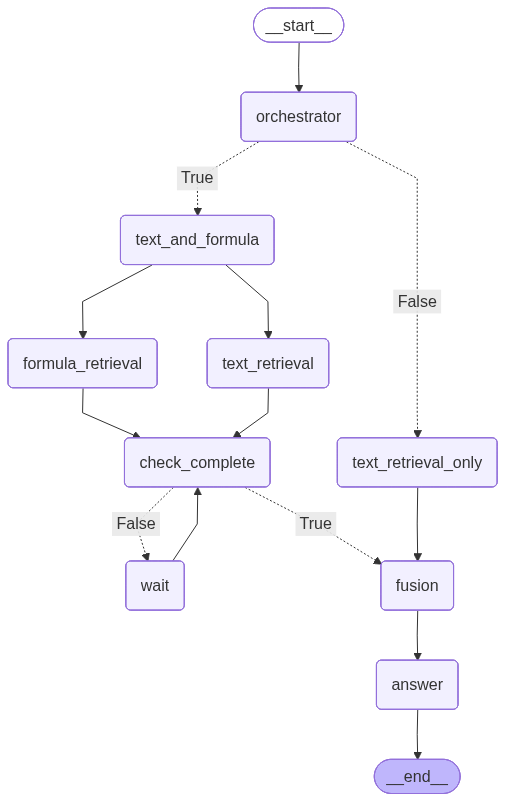

In [58]:
from IPython.display import Image, display
display(Image(graph_chat.get_graph().draw_mermaid_png()))

In [59]:
# Load checkpoint và paper_info
import requests
from google.colab import drive
drive.mount('/content/drive')

paper_info_path = Path("/content/drive/MyDrive/CheckpointKLTN/paper_info_KB3.json")
checkpoint_path = Path("/content/drive/MyDrive/CheckpointKLTN/checkpoint_KB3.txt")
save_dir = Path("/content")
save_dir.mkdir(parents=True, exist_ok=True)

if not checkpoint_path.exists():
    with open(checkpoint_path, "w") as f:
        f.write("0")

# Đọc checkpoint
def read_checkpoint_txt(path):
    try:
        with open(path, "r") as f:
            return int(f.read().strip())
    except (FileNotFoundError, ValueError):
        return 0

# Đọc paper_info
def read_paper_info(path):
    try:
        with open(path, "r") as f:
            return json.load(f)
    except (FileNotFoundError, ValueError):
        return None

# Tải paper dựa trên paper_id
def download_paper(paper_id, save_folder):
    url = f"https://arxiv.org/pdf/{paper_id}.pdf"
    try:
        r = requests.get(url)
        if r.status_code == 200:
            file_path = save_folder / f"{paper_id}.pdf"
            with open(file_path, "wb") as f:
                f.write(r.content)
            print(f"Saved: {file_path.name}")
        else:
            print(f"Failed: {paper_id} (HTTP {r.status_code})")
    except Exception as e:
        print(f"Error downloading {paper_id}: {e}")

current_index = read_checkpoint_txt(checkpoint_path)
print(f"Current checkpoint index: {current_index}")

paper_info = read_paper_info(paper_info_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current checkpoint index: 24


In [62]:
# Hàm đếm số trang trong tài liệu
def get_page_count(path: str) -> int:
    with fitz.open(path) as doc:
        return doc.page_count

if __name__ == "__main__":
    cnt = 3

    while cnt >= 0:
        next_papers = paper_info[current_index: current_index +3]
        all_parse_time = 0

        for paper in next_papers:
            download_paper(paper["paper_id"], save_dir)

        check_end_test = False
        if next_papers == []:
            print("Không còn paper nào mới để tải.")
            check_end_test = True

        if check_end_test:
            exit()

        start = time.time()  # lưu thời điểm bắt đầu
        sources = []
        for paper in next_papers:
            sources.append(Path(f"/content/{paper['paper_id']}.pdf"))

        workflow = build_root_graph()
        workflow.invoke({"sources": sources})
        end = time.time()  # lưu thời điểm kết thúc
        all_parse_time = end - start  # thời gian chạy


        text_index = M3Embeddings(faiss_dir="/content/out/vectorstore_text", model = model_embedding)
        text_index.load_db()
        text_index.vectorstore

        faiss_formula_dir = Path("/content/out/vectorstore_formula")
        formula_check = False
        if faiss_formula_dir.exists():
            formula_index = FormulaIndex(faiss_dir = "/content/out/vectorstore_formula", model_name="tbs17/MathBERT", model = model_formula, tokenizer = tokenizer_formula, device="cuda")
            formula_index.load_db()
            formula_index.vectorstore
            formula_check = True

        main_lang = 0
        with open("/content/out/main_lang.txt", "r") as f:
            main_lang = int(f.read())

        # Stat khởi tạo
        initial_state: ChatState = {
            "messages": [HumanMessage(content="")],
            "search_query": "",
            "formula_needed": False,
            "text_results": [],
            "formula_results": [],
            "merged_results": [],
            "answer": "",
            "formula_check": formula_check,
            "formula_index": formula_index,
            "text_index": text_index,
            "main_lang": main_lang,
            "answer_lang": 1
        }

        for paper in next_papers:
            paper_count = get_page_count(f"/content/{paper['paper_id']}.pdf")

            for qa in paper["question_and_answer"]:
                initial_state["messages"].append(HumanMessage(content = qa["question"]))
                initial_state = graph_chat.invoke(initial_state)
                print("\n===============================\n")
                print(f"Question: {qa['question']}")
                print("------------")
                print(f"RAG answer: {initial_state["answer"]}")
                print("------------")
                print(f"Answer truth: {qa['answer']}")
                print("\n===============================\n")

                qa["rag_answer"] = initial_state["answer"]

        for paper in next_papers:
            paper["parse_time"] = all_parse_time / 3
            paper_count = get_page_count(f"/content/{paper['paper_id']}.pdf")
            paper["page_count"] = paper_count

        with open(paper_info_path, "w", encoding="utf-8") as f:
            json.dump(paper_info, f, ensure_ascii=False, indent=2)

        current_index += 3
        cnt -= 3

    with open(checkpoint_path, "w") as f:
        f.write(str(current_index + 21))